# Purpose: 
The purpose of this notebook is to create a simple linear regression model using Pseudoinversion

In [1]:
import numpy as np

In [2]:
# Simple linear regression model using Pseudoinverse

class linear_regression():
    '''
    Linear Regression Model
    '''
    
    def fit(self,X_train,y_train):
        '''
        fit method:
        X_train: numpy matrix of the features. Must have a matrix shape.
        y_train: numpy vector of the target variables.
        '''
        self.X_train = X_train
        self.y_train = y_train
        X_1 = np.column_stack(
        (np.ones(self.X_train.shape[0]),self.X_train))
    
        w = np.dot(np.linalg.pinv(X_1),self.y_train)
        self.intercept = w[0]
        self.coefficients = w[1:].reshape(1,-1)
        return self
        
    def predict(self,X_test):
        '''
        predict method:
        X_test: numpy matrix of the features. Must have a matrix shape.
        Returns the y_preds
        '''
        y_pred = self.intercept + np.dot(X_test,self.coefficients)
        return y_pred
    
    def score(self,X_test,y_test):
        '''
        score method:
        X_test: numpy matrix of the features. Must have a matrix shape.
        y_test: numpy vector of the target variables.
        Returns the RMSE
        '''
        y_pred = self.intercept + np.dot(X_test,self.coefficients)
        error = y_pred - y_test
        RMSE = np.sqrt((error**2).mean())
        return RMSE  

In [3]:
# sample X data.  note the shape

X = np.array([[103.6, 127., 42., 70.9, 97., 126., 72.7, 123., 103.,
        99., 76., 76., 99., 75.2, 98., 77., 76.,137.,
        80., 98., 99., 74., 69.,103., 78., 74., 65.,
       104., 129.]]).reshape(-1,1)
X, X.shape

(array([[103.6],
        [127. ],
        [ 42. ],
        [ 70.9],
        [ 97. ],
        [126. ],
        [ 72.7],
        [123. ],
        [103. ],
        [ 99. ],
        [ 76. ],
        [ 76. ],
        [ 99. ],
        [ 75.2],
        [ 98. ],
        [ 77. ],
        [ 76. ],
        [137. ],
        [ 80. ],
        [ 98. ],
        [ 99. ],
        [ 74. ],
        [ 69. ],
        [103. ],
        [ 78. ],
        [ 74. ],
        [ 65. ],
        [104. ],
        [129. ]]),
 (29, 1))

In [4]:
# sample X data.  note the shape

y = np.array([[2865., 2897., 2849., 2863., 2872., 2891., 2841., 2894., 2884.,
       2881., 2853., 2846., 2878., 2861., 2867., 2852., 2866., 2889.,
       2861., 2886., 2884., 2853., 2849., 2864., 2870., 2878., 2866.,
       2877., 2893.]]).reshape(-1,1)
y, y.shape

(array([[2865.],
        [2897.],
        [2849.],
        [2863.],
        [2872.],
        [2891.],
        [2841.],
        [2894.],
        [2884.],
        [2881.],
        [2853.],
        [2846.],
        [2878.],
        [2861.],
        [2867.],
        [2852.],
        [2866.],
        [2889.],
        [2861.],
        [2886.],
        [2884.],
        [2853.],
        [2849.],
        [2864.],
        [2870.],
        [2878.],
        [2866.],
        [2877.],
        [2893.]]),
 (29, 1))

In [5]:
lr = linear_regression()
lr.fit(X_train=X, y_train=y)
y_pred = lr.predict(X) # using the same data to see how well it learned
y_pred

array([[2877.05167655],
       [2890.60767571],
       [2841.3657984 ],
       [2858.10803669],
       [2873.2281896 ],
       [2890.02835951],
       [2859.15080585],
       [2888.2904109 ],
       [2876.70408683],
       [2874.38682201],
       [2861.06254933],
       [2861.06254933],
       [2874.38682201],
       [2860.59909636],
       [2873.80750581],
       [2861.64186553],
       [2861.06254933],
       [2896.40083775],
       [2863.37981414],
       [2873.80750581],
       [2874.38682201],
       [2859.90391692],
       [2857.0073359 ],
       [2876.70408683],
       [2862.22118173],
       [2859.90391692],
       [2854.69007109],
       [2877.28340303],
       [2891.76630812]])

In [6]:
# RMSE
lr.score(X_test=X, y_test=y)

8.887706743541376

In [7]:
import matplotlib.pyplot as plt

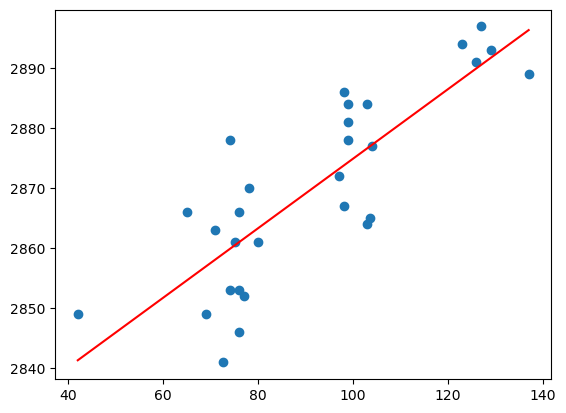

In [8]:
# plotting the regression line

plt.scatter(x=X, y=y)

x_min, x_max = X.min(), X.max()
y_min, y_max = lr.coefficients*x_min+lr.intercept, lr.coefficients*x_max+lr.intercept

plt.plot([x_min, x_max], [y_min[0][0], y_max[0][0]], c='r') 

Text(0, 0.5, 'Residuals')

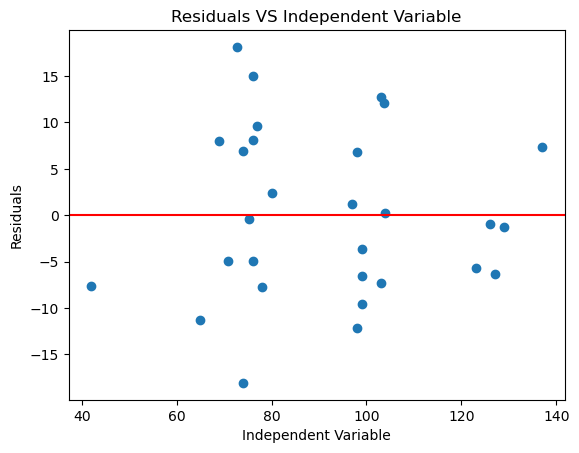

In [9]:
# plotting the residuals

errors = y_pred - y

plt.scatter(x=X, y=errors)
plt.axhline(0, c='r')
plt.title('Residuals VS Independent Variable')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

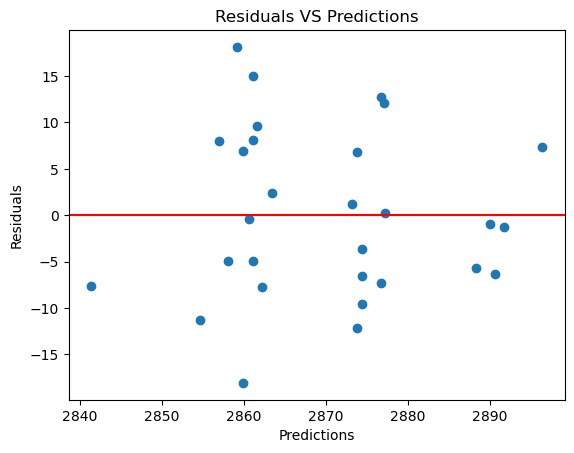

In [10]:
# plotting the residuals

errors = y_pred - y

plt.scatter(x=y_pred, y=errors)
plt.axhline(0, c='r')
plt.title('Residuals VS Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')